In [ ]:
# Import modul yang akan digunakan di sel ini
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import matplotlib.animation as animation
from matplotlib import colors
import math
import pandas as pd
from matplotlib import rc
from IPython.display import HTML

In [ ]:
TREE = 1
BURNING = 2
GONE = 3
m = n = 17
mid = int((m + 1)/2)
BurnProbability = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [ ]:
def InitTree(m, n, TREE, BURNING) :
  Forest = [[TREE for j in range(n)] for i in range(m)]
  Forest[0][0] = BURNING
  Forest[mid - 1][mid - 1] = BURNING
  Forest[16][16] = BURNING
  return Forest

In [ ]:
def Periodic_Boundary(m, n, Forest) :
  Forest_ext = [[1 for j in range(n + 2)] for i in range(m + 2)]
  for i in range(1, m + 1) :
    for j in range(1, n + 1) :
      Forest_ext[i][j] = Forest[i - 1][j - 1]
  for i in range(1, m + 1) :
    Forest_ext[i][0] = Forest_ext[i][m]
    Forest_ext[i][n + 1] = Forest_ext[i][1]
  for j in range(n + 2) :
    Forest_ext[0][j] = Forest_ext[m][j]
    Forest_ext[m + 1][j] = Forest_ext[1][j]
  return Forest_ext

In [ ]:
def SpreadWithGone(forest, probBurning, N, W, S, E) :
  if forest == TREE :
    if N == BURNING or W == BURNING or S == BURNING or E == BURNING :
      if np.random.random() < probBurning :
        forest = BURNING
      else :
        forest = TREE
    else :
      forest = TREE
  elif forest == BURNING :
    forest = GONE
  return forest

In [ ]:
def apply_Spread_with_gone(forest_ext, probBurning) :
  forest_new = [[1 for j in range(n)] for i in range(m)]
  for i in range(1, m + 1) :
    for j in range(1, n + 1) :
      N = forest_ext[i - 1][j]
      W = forest_ext[i][j + 1]
      S = forest_ext[i + 1][j]
      E = forest_ext[i][j - 1]
      forest = forest_ext[i][j]
      forest_new[i - 1][j - 1] = SpreadWithGone(forest, probBurning, N, W, S, E)
  return forest_new

In [ ]:
def simulationwithgone(m, n, prob_burning, t=30):
  forest = InitTree(m, n, TREE, BURNING)
  col_forest = [[get_color_with_gone(site) for site in row] for row in forest]
  animation_forest = [col_forest]
  #for burn in prob_burning :
  for i in range(t):
    forest_ext = Periodic_Boundary(m, n, forest)
    forest = apply_Spread_with_gone(forest_ext, prob_burning)
    col_forest = [[get_color_with_gone(site) for site in row] for row in forest]
    animation_forest.append(col_forest)
  return animation_forest

In [ ]:
def get_color_with_gone(value):
    if value == 1:   # Site with tree
        return (0, 155, 0)  # Green
    elif value == 2: # Burning tree
        return (255, 0, 0)  # Red
    else:            # Tree gone
        return (0, 0, 0)    # White

In [ ]:
def burningtimewithgone(m, n, prob_burning, t=30):
  forest = InitTree(m, n, TREE, BURNING)
  col_forest = [[get_color_with_gone(site) for site in row] for row in forest]
  animation_forest = [col_forest]
  time = 30
  #for burn in prob_burning :
  for i in range(t):
    forest_ext = Periodic_Boundary(m, n, forest)
    forest = apply_Spread_with_gone(forest_ext, prob_burning)
    col_forest = [[get_color_with_gone(site) for site in row] for row in forest]
    animation_forest.append(col_forest)
    allburned = True
    for k1 in range(m):
      for k2 in range(n):
        if animation_forest[-1][k1][k2] != (0, 0, 0):
          allburned = False
    if allburned:
      time = i+1
      break
  return time

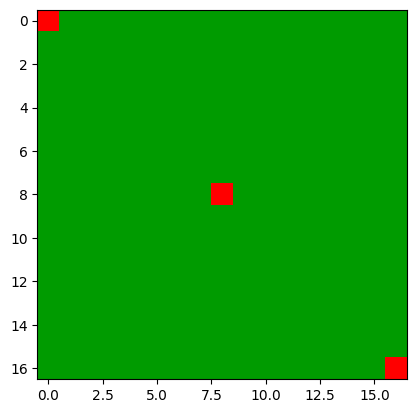

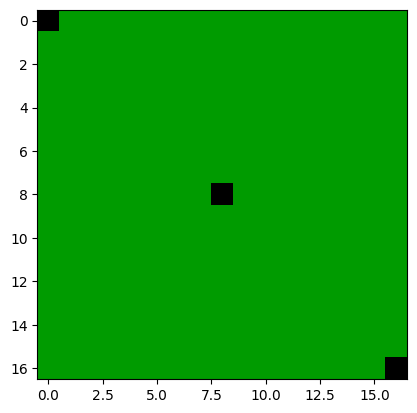

In [ ]:
animasi = simulationwithgone(m, n, BurnProbability[0], t=30)

fig, ax = plt.subplots()
image = plt.imshow(animasi[0])
plt.show()
image = plt.imshow(animasi[-1])
plt.show()
# Fungsi iterasi animasi
def animate(i):
  image.set_data(animasi[i])
  return image
anim = animation.FuncAnimation(fig, animate, frames=range(len(animasi)), blit=False,
                               interval=30)

# Kode tambahan jika dijalankan di colab/jupyter
from matplotlib import rc
from IPython.display import HTML
rc('animation', html='jshtml')
anim


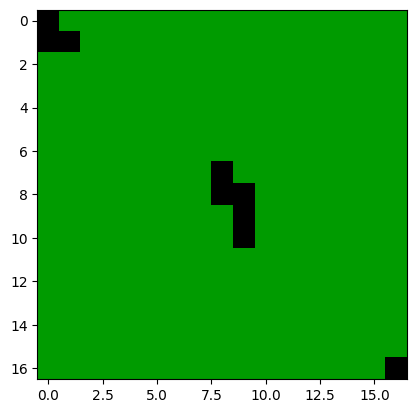

In [ ]:
animasi = simulationwithgone(m, n, BurnProbability[1], t=30)

fig, ax = plt.subplots()
image = plt.imshow(animasi[0])
image = plt.imshow(animasi[-1])
plt.show()
# Fungsi iterasi animasi
def animate(i):
  image.set_data(animasi[i])
  return image
anim = animation.FuncAnimation(fig, animate, frames=range(len(animasi)), blit=False,
                               interval=30)

# Kode tambahan jika dijalankan di colab/jupyter
from matplotlib import rc
from IPython.display import HTML
rc('animation', html='jshtml')
anim

# aaaaaa udah bisa gerak

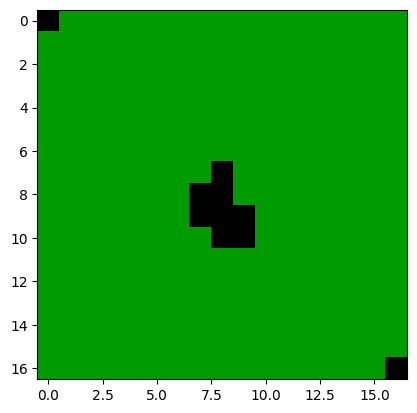

In [ ]:
animasi = simulationwithgone(m, n, BurnProbability[2], t=30)

fig, ax = plt.subplots()
image = plt.imshow(animasi[0])
image = plt.imshow(animasi[-1])
plt.show()
# Fungsi iterasi animasi
def animate(i):
  image.set_data(animasi[i])
  return image
anim = animation.FuncAnimation(fig, animate, frames=range(len(animasi)), blit=False,
                               interval=30)

# Kode tambahan jika dijalankan di colab/jupyter
from matplotlib import rc
from IPython.display import HTML
rc('animation', html='jshtml')
anim

# aaaaaa udah bisa gerak

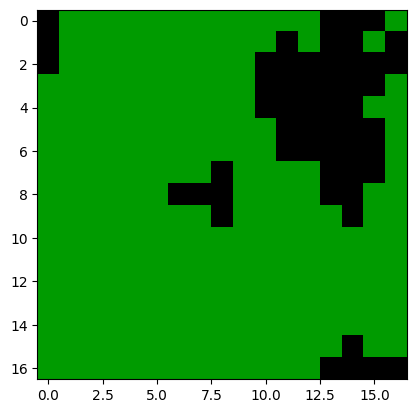

In [ ]:
animasi = simulationwithgone(m, n, BurnProbability[3], t=30)

fig, ax = plt.subplots()
image = plt.imshow(animasi[0])
image = plt.imshow(animasi[-1])
plt.show()
# Fungsi iterasi animasi
def animate(i):
  image.set_data(animasi[i])
  return image
anim = animation.FuncAnimation(fig, animate, frames=range(len(animasi)), blit=False,
                               interval=30)

# Kode tambahan jika dijalankan di colab/jupyter
from matplotlib import rc
from IPython.display import HTML
rc('animation', html='jshtml')
anim

# aaaaaa udah bisa gerak

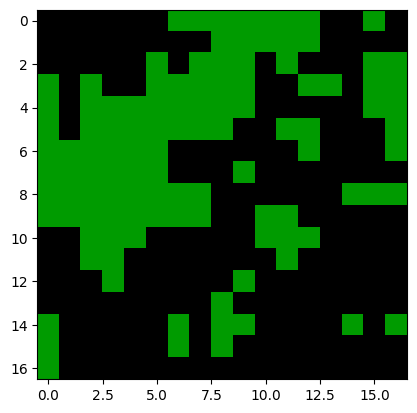

In [ ]:
animasi = simulationwithgone(m, n, BurnProbability[4], t=30)

fig, ax = plt.subplots()
image = plt.imshow(animasi[0])
image = plt.imshow(animasi[-1])
plt.show()
# Fungsi iterasi animasi
def animate(i):
  image.set_data(animasi[i])
  return image
anim = animation.FuncAnimation(fig, animate, frames=range(len(animasi)), blit=False,
                               interval=30)

# Kode tambahan jika dijalankan di colab/jupyter
from matplotlib import rc
from IPython.display import HTML
rc('animation', html='jshtml')
anim

# aaaaaa udah bisa gerak

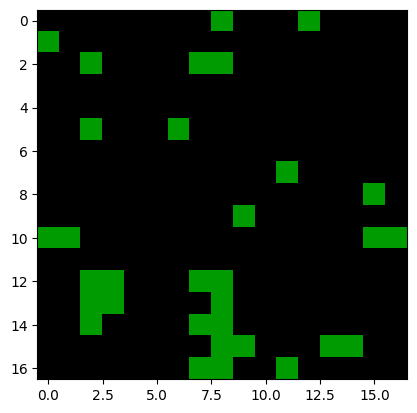

In [ ]:
animasi = simulationwithgone(m, n, BurnProbability[5], t=30)

fig, ax = plt.subplots()
image = plt.imshow(animasi[0])
image = plt.imshow(animasi[-1])
plt.show()
# Fungsi iterasi animasi
def animate(i):
  image.set_data(animasi[i])
  return image
anim = animation.FuncAnimation(fig, animate, frames=range(len(animasi)), blit=False,
                               interval=30)

# Kode tambahan jika dijalankan di colab/jupyter
from matplotlib import rc
from IPython.display import HTML
rc('animation', html='jshtml')
anim

# aaaaaa udah bisa gerak

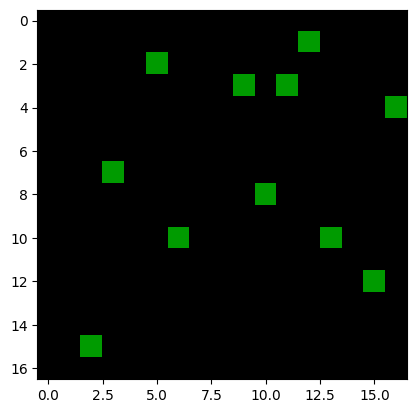

In [ ]:
animasi = simulationwithgone(m, n, BurnProbability[6], t=30)

fig, ax = plt.subplots()
image = plt.imshow(animasi[0])
image = plt.imshow(animasi[-1])
plt.show()
# Fungsi iterasi animasi
def animate(i):
  image.set_data(animasi[i])
  return image
anim = animation.FuncAnimation(fig, animate, frames=range(len(animasi)), blit=False,
                               interval=30)

# Kode tambahan jika dijalankan di colab/jupyter
from matplotlib import rc
from IPython.display import HTML
rc('animation', html='jshtml')
anim

# aaaaaa udah bisa gerak

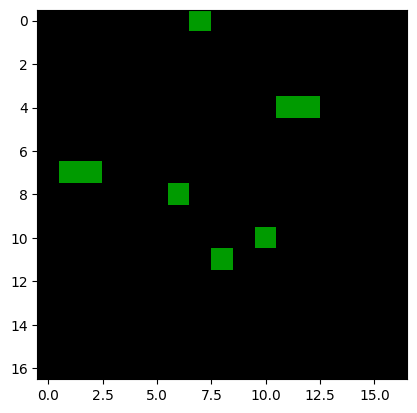

In [ ]:
animasi = simulationwithgone(m, n, BurnProbability[7], t=30)

fig, ax = plt.subplots()
image = plt.imshow(animasi[0])
image = plt.imshow(animasi[-1])
plt.show()
# Fungsi iterasi animasi
def animate(i):
  image.set_data(animasi[i])
  return image
anim = animation.FuncAnimation(fig, animate, frames=range(len(animasi)), blit=False,
                               interval=30)

# Kode tambahan jika dijalankan di colab/jupyter
from matplotlib import rc
from IPython.display import HTML
rc('animation', html='jshtml')
anim

# aaaaaa udah bisa gerak

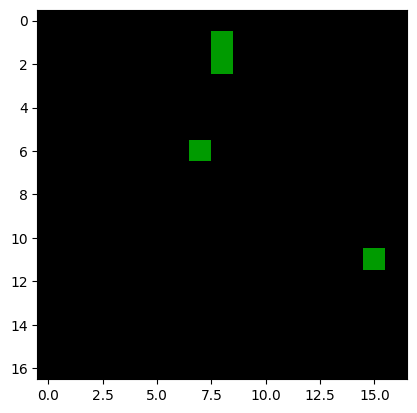

In [ ]:
animasi = simulationwithgone(m, n, BurnProbability[8], t=30)

fig, ax = plt.subplots()
image = plt.imshow(animasi[0])
image = plt.imshow(animasi[-1])
plt.show()
# Fungsi iterasi animasi
def animate(i):
  image.set_data(animasi[i])
  return image
anim = animation.FuncAnimation(fig, animate, frames=range(len(animasi)), blit=False,
                               interval=30)

# Kode tambahan jika dijalankan di colab/jupyter
from matplotlib import rc
from IPython.display import HTML
rc('animation', html='jshtml')
anim

# aaaaaa udah bisa gerak

In [ ]:
def LoopingWithGone(m, n):
  vec_all_time = []
  vec_all_mean = []
  for i in range(9):
    vec_persen = [[] for i in range(9)]
    vec_persen_mean = []
    for j in range(10):
      hasil = simulationwithgone(m, n, BurnProbability[i], t=30)
      count = 0
      for k1 in range(m):
        for k2 in range(n):
          if hasil[-1][k1][k2] == (0, 0, 0):
            count = count + 1
      persen = (count / (17 * 17)) * 100
      vec_persen[i].append(persen)
      waktu = burningtimewithgone(m, n, BurnProbability[i], t=30)
      if waktu != 30:
        vec_all_time.append([BurnProbability[i], j, waktu])
    mean = 0
    for j in range(len(vec_persen[i])):
      mean += vec_persen[i][j]
    mean = mean / 10
    vec_all_mean.append(mean)
  return vec_all_mean, vec_all_time

In [ ]:
y, z = LoopingWithGone(17,17)
x = BurnProbability
print(x, y)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] [1.5570934256055362, 3.4256055363321805, 6.401384083044983, 17.785467128027683, 60.24221453287197, 87.16262975778548, 94.74048442906575, 97.5432525951557, 99.27335640138406]


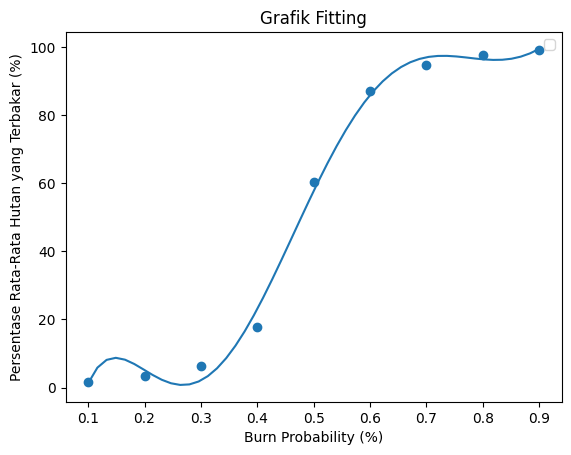

y = -100.78816844 + 2041.44277263 * x - 13644.56265025 * (x ** 2) + 39573.64646802 * (x ** 3) - 52176.57600842 * (x ** 4) + 30376.24453204 * (x ** 5) - 5904.77407202 * (x ** 6)


In [ ]:
from scipy.optimize import curve_fit
plt.scatter(x, y)
def f6(x, a6, a5, a4, a3, a2, a1, a0) :
  return a0 + a1 * x + a2 * (x ** 2) + a3 * (x ** 3) + a4 * (x ** 4) + a5 * (x ** 5) + a6 * (x ** 6)
init_vals = [1, 1, 1, 1, 1, 1, 1]
popc, pcov = curve_fit(f6, x, y, p0 = init_vals)
xfit = np.linspace(x[0],x[8],50)
plt.plot(xfit, f6(xfit, *popc))
plt.title("Grafik Fitting")
plt.xlabel("Burn Probability (%)")
plt.ylabel("Persentase Rata-Rata Hutan yang Terbakar (%)")
plt.legend()
plt.show()
print("y = -100.78816844 + 2041.44277263 * x - 13644.56265025 * (x ** 2) + 39573.64646802 * (x ** 3) - 52176.57600842 * (x ** 4) + 30376.24453204 * (x ** 5) - 5904.77407202 * (x ** 6)")